In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures

import time
import os

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

import WOSutilities as wosutil

path2rawdata = '/home/sree/code/science-of-genius-title-impact/sample-data'

In [4]:
# we need to load articles and categories

article_df = wosutil.load_wos_data(name = 'article', 
                                   path2rawdata = path2rawdata,
                                   year_list = None, 
                                   columns = ['ArticleID', 'PubYear', 'Doctypes', 'Title'], 
                                   dropna = ['ArticleID', 'PubYear'], 
                                   duplicate_subset = ['ArticleID'],
                                   isindict = {'Doctypes':np.sort(['Article','Letter','Review','Note'])}, 
                                   verbose = 50)

# select all categories for all the aricles published
category_list = np.array(['Physics, Applied'])  

category_df = wosutil.load_wos_data(name = 'category', 
                                    path2rawdata = path2rawdata,
                                    year_list = None,
                                    columns = None, 
                                    dropna = ['ArticleID'], 
                                    duplicate_subset = None,
                                    isindict = {'Label':category_list},
                                    verbose = 100)

Final DF Shape (1092061, 4)
Final DF Shape (10559, 3)


In [5]:
# Article data frame
article_df.head()

,ArticleID,PubYear,Doctypes,Title
1074,000188724900460,1922,Letter,Why is septic aural discharge so common ?
76559,000200401000287,1934,Letter,"The GP, the schoolmaster, and the specialist"
76558,000202753700002,1908,Article,The determination of vapour pressures of solut...
76557,000202408700045,1944,Article,Relationship of penicillin to sulfonamide action
76556,000188445600529,1940,Article,Polymerization of beta-methallyl alcohol and i...


In [6]:
# category data frame
category_df.head()

,ArticleID,Type,Label
225680,000200031700004,ASCA traditional subject,"Physics, Applied"
610854,000200028100005,ASCA traditional subject,"Physics, Applied"
610753,000200035100009,ASCA traditional subject,"Physics, Applied"
610482,000202852700021,ASCA traditional subject,"Physics, Applied"
610440,000200031600006,ASCA traditional subject,"Physics, Applied"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21fc165588>]],
      dtype=object)

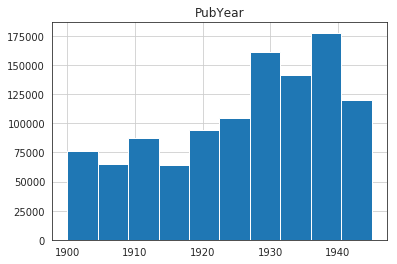

In [7]:
#plot of articles each year - sample

article_df.hist(column='PubYear')

In [8]:
# joining the dataframes
data = article_df.merge(category_df, 
                        how = 'left',
                        on = 'ArticleID')

In [9]:
# there are no duplicates
data = data.dropna()
data = data.sort_values(by="PubYear")
data['Label'].unique()

array(['Physics, Applied'], dtype=object)

In [10]:
# tiny processing - removing stop words from title
import preprocessing as pp

data['article_tokens'] = data.Title.apply(lambda x: pp.process(x))
data.head()

,ArticleID,PubYear,Doctypes,Title,Type,Label,article_tokens
700120,000202851500036,1900,Article,On an intrusion of diabase into permo-carbonif...,ASCA traditional subject,"Physics, Applied","[intrusion, diabase, permocarboniferous, rock,..."
526127,000208072900004,1900,Article,Scales of Seismic Intensity,ASCA traditional subject,"Physics, Applied","[scale, seismic, intensity]"
281965,000202851500017,1900,Article,Photometry of the diffuse reflexion of light o...,ASCA traditional subject,"Physics, Applied","[photometry, diffuse, reflexion, light, matt, ..."
866600,000202851500032,1900,Article,On obliquely-crossed cylindrical lenses.,ASCA traditional subject,"Physics, Applied","[obliquelycrossed, cylindrical, lens]"
994383,000202851500042,1900,Letter,On Mr. Morris-Airey's paper on electrolytic co...,ASCA traditional subject,"Physics, Applied","[morrisaireys, paper, electrolytic, conduction..."


In [11]:
keywords = data['article_tokens'].tolist()
flat_list = [item for sublist in keywords for item in sublist]

from collections import Counter
frequencies = dict(Counter(flat_list))

import operator
keywords_sorted_by_freq = sorted(frequencies.items(), key=operator.itemgetter(1), reverse=True)
frequent_words = [word for (word, freq) in keywords_sorted_by_freq]

# top 20 keywords in titles in the corpus
frequent_words[:20]

['theory',
 'note',
 'method',
 'effect',
 'electron',
 'spectrum',
 'measurement',
 'part',
 'temperature',
 'magnetic',
 'gas',
 'radiation',
 'field',
 'electric',
 'high',
 'liquid',
 'solution',
 'xray',
 'electrical',
 'problem']

In [12]:
data['PubYear'].unique()

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944])

In [13]:
from wordcloud import WordCloud

# wordcloud = WordCloud(background_color='white')
# wordcloud.generate_from_frequencies(frequencies=frequencies)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [14]:
#binning ranges

bins = [(1899 + x) for x in range(0,100,10)]
data['pub_year_binned'] = pd.cut(data['PubYear'], bins)
data[data['PubYear'] == 1906].head()

,ArticleID,PubYear,Doctypes,Title,Type,Label,article_tokens,pub_year_binned
136873,000202852700024,1906,Article,On the asymmetrical action of an alternating c...,ASCA traditional subject,"Physics, Applied","[asymmetrical, action, alternating, current, p...","(1899, 1909]"
392649,000202852700060,1906,Article,LXVIII. The black spot in the thin liquid films,ASCA traditional subject,"Physics, Applied","[lxviii, black, spot, thin, liquid, film]","(1899, 1909]"
485714,000202852800032,1906,Article,"On the recombination of ions made by alpha, be...",ASCA traditional subject,"Physics, Applied","[recombination, ion, made, alpha, beta, gamma,...","(1899, 1909]"
33294,000202852700057,1906,Article,On some properties of the alpha rays emitted b...,ASCA traditional subject,"Physics, Applied","[property, alpha, ray, emitted, radium, body, ...","(1899, 1909]"
131785,000202852800013,1906,Article,On some properties of the alpha rays of radiot...,ASCA traditional subject,"Physics, Applied","[property, alpha, ray, radiothorium]","(1899, 1909]"


In [15]:
del data['Doctypes']
del data['Type']
del data['Label']
del data['Title']
del data['ArticleID']

In [16]:
year_ranges = data['pub_year_binned'].unique()
foo = [data[data['pub_year_binned'] == year_range] for year_range in year_ranges]

In [17]:
# removing 'data' from memory - not sure if this works
import gc
del [[data]]
gc.collect()
data=pd.DataFrame()

[(1899, 1909]]
Categories (1, interval[int64]): [(1899, 1909]]


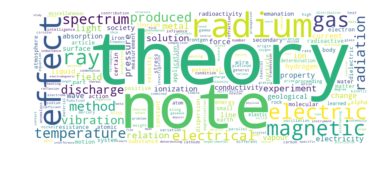

[(1909, 1919]]
Categories (1, interval[int64]): [(1909, 1919]]


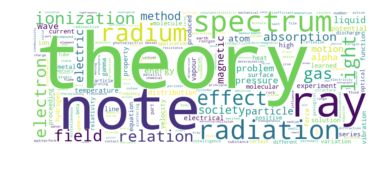

[(1919, 1929]]
Categories (1, interval[int64]): [(1919, 1929]]


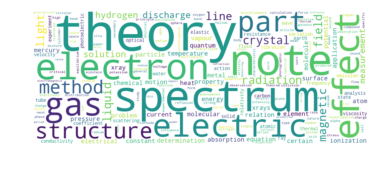

[(1929, 1939]]
Categories (1, interval[int64]): [(1929, 1939]]


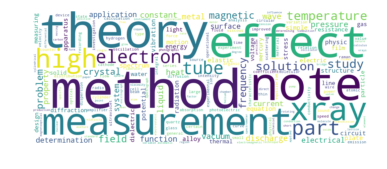

[(1939, 1949]]
Categories (1, interval[int64]): [(1939, 1949]]


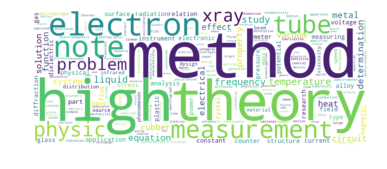

In [18]:
for period in range(len(foo)):
    
    keywords = foo[period]['article_tokens'].tolist()
    flat_list = [item for sublist in keywords for item in sublist]

    from collections import Counter
    frequencies = dict(Counter(flat_list))
    
    print(foo[period]['pub_year_binned'].unique())
    
    wordcloud = WordCloud(background_color='white',
                          width=1000, 
                          height=400)
    wordcloud.generate_from_frequencies(frequencies=frequencies)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()